In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [3]:
df=pd.read_csv("Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [6]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
df.shape

(10000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
df[df.duplicated()].sum()

Hours Studied                                                                     642
Previous Scores                                                                  8865
Extracurricular Activities          NoYesNoYesYesNoNoNoNoNoYesNoYesNoNoNoYesYesYes...
Sleep Hours                                                                       819
Sample Question Papers Practiced                                                  585
Performance Index                                                              7094.0
dtype: object

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(9873, 6)

In [14]:
df[df.duplicated()].sum()

Hours Studied                         0
Previous Scores                       0
Extracurricular Activities            0
Sleep Hours                           0
Sample Question Papers Practiced      0
Performance Index                   0.0
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [19]:
df["Extracurricular Activities"]=LabelEncoder().fit_transform(df["Extracurricular Activities"])

In [21]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].astype(int)

In [22]:
df["Performance Index"]=df["Performance Index"].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9873 non-null   int64
 1   Previous Scores                   9873 non-null   int64
 2   Extracurricular Activities        9873 non-null   int32
 3   Sleep Hours                       9873 non-null   int64
 4   Sample Question Papers Practiced  9873 non-null   int64
 5   Performance Index                 9873 non-null   int32
dtypes: int32(2), int64(4)
memory usage: 462.8 KB


In [24]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,9873.0,4.992100,2.589081,1.0,3.0,5.0,7.0,9.0
Previous Scores,9873.0,69.441102,17.325601,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,9873.0,0.494986,0.500000,0.0,0.0,0.0,1.0,1.0
Sleep Hours,9873.0,6.531652,1.697683,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,9873.0,4.583004,2.867202,0.0,2.0,5.0,7.0,9.0
Performance Index,9873.0,55.216651,19.208570,10.0,40.0,55.0,70.0,100.0


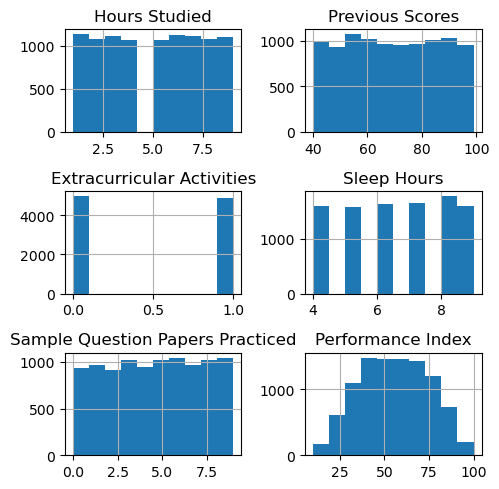

In [73]:
df.hist(bins=10,figsize=(5,5))
plt.tight_layout()
plt.show()

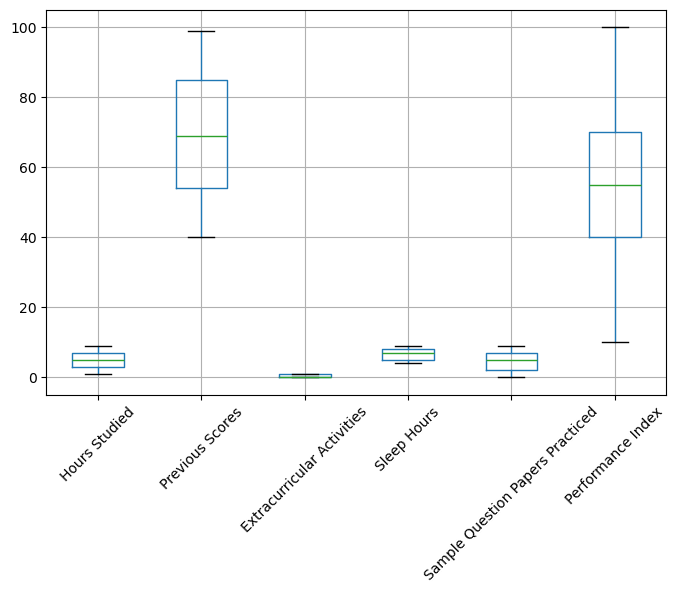

In [74]:
plt.figure(figsize=(8,5))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

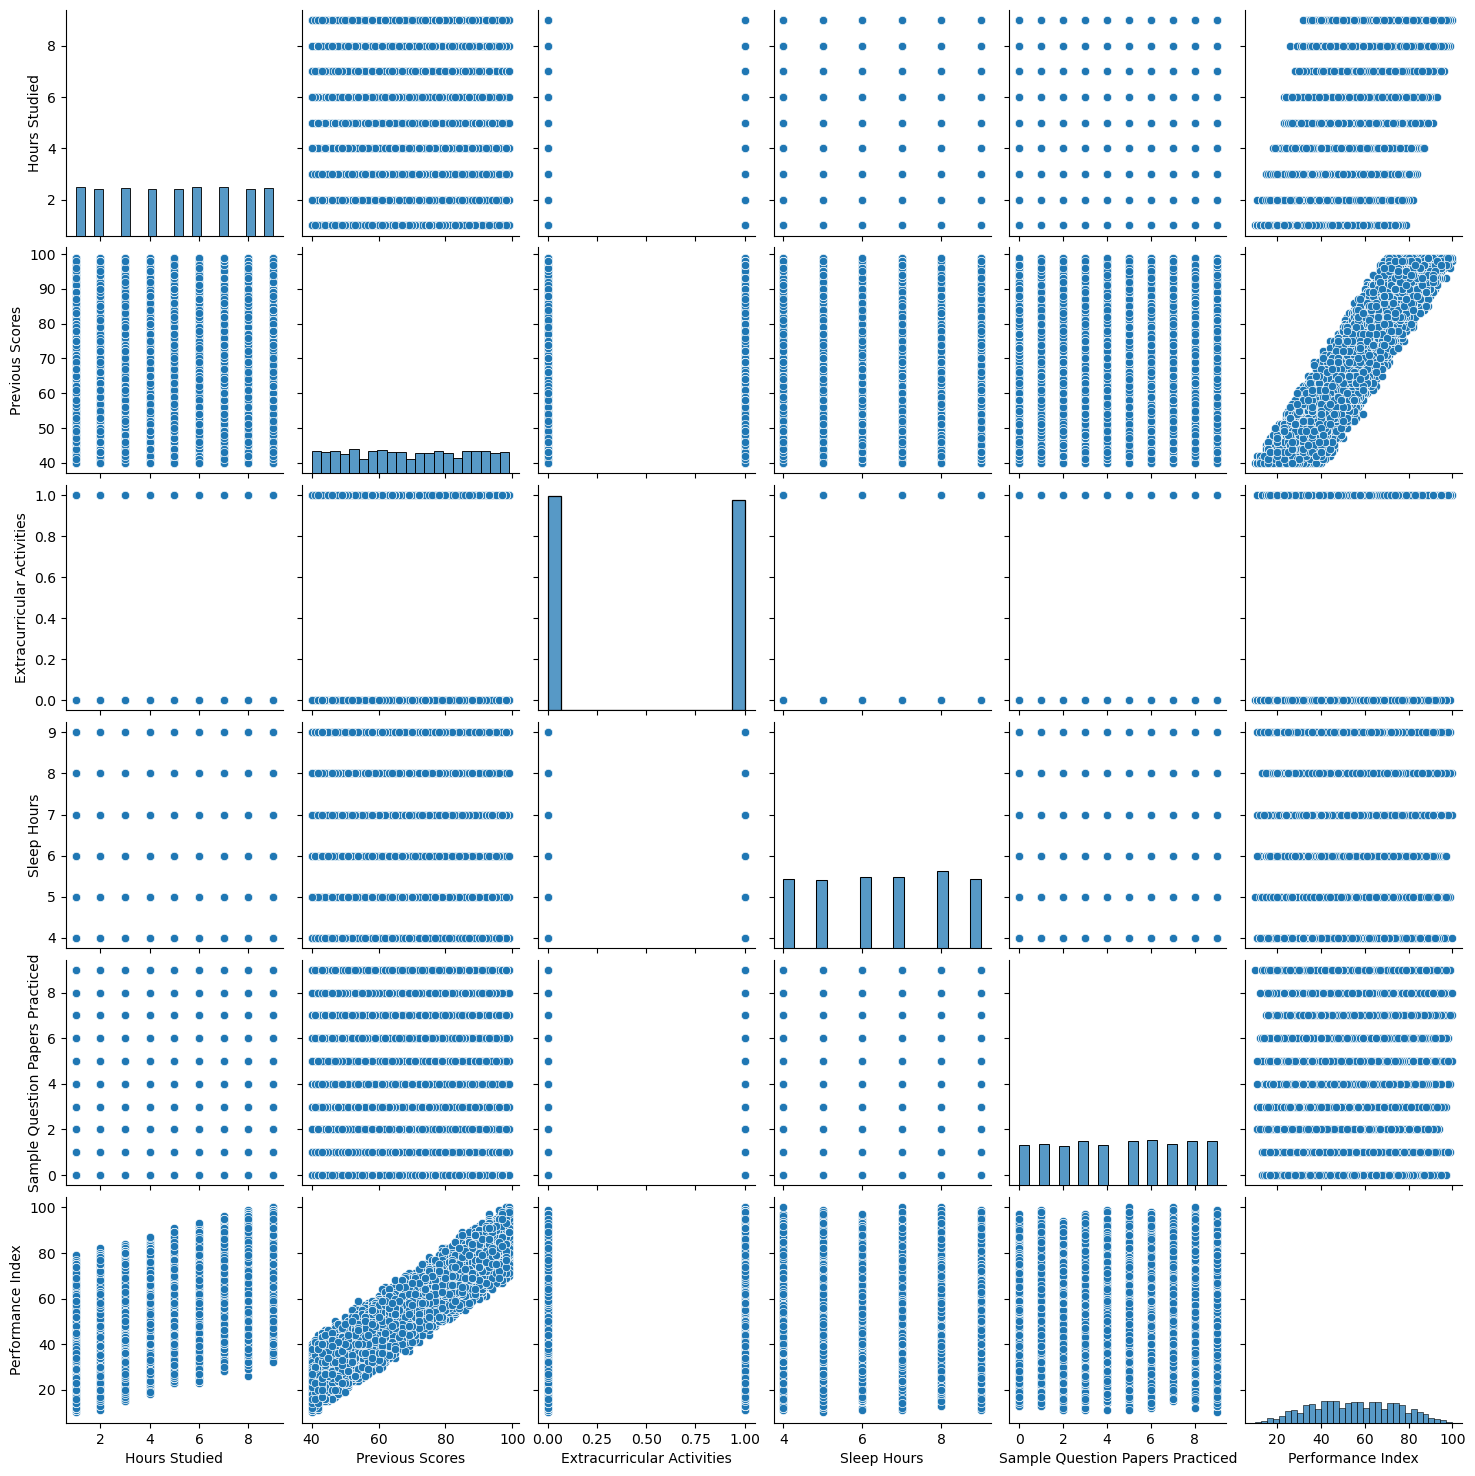

In [75]:
sns.pairplot(df)
plt.show()

In [33]:
z_score=np.abs(stats.zscore(df))
remove_outlier=df[(z_score<3).all(axis=1)]

In [34]:
data=remove_outlier

<Axes: >

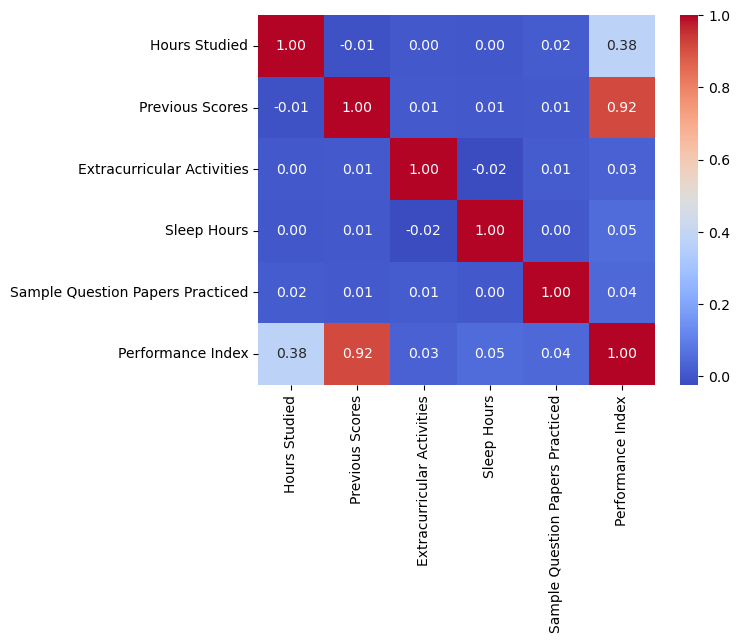

In [37]:
sns.heatmap(data=df.corr(),annot=True,cmap="coolwarm",fmt=".2f")

In [39]:
target=data[["Performance Index"]]

In [40]:
feature=data.drop(columns="Performance Index")

In [43]:
target.head()

,Performance Index
0,91
1,65
2,45
3,36
4,66


In [44]:
feature.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [45]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=10)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7404, 5)
(2469, 5)
(7404, 1)
(2469, 1)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [59]:
mlr_reg=LinearRegression()

In [60]:
print(type(mlr_reg))

<class 'sklearn.linear_model._base.LinearRegression'>


In [61]:
mlr_reg.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred=mlr_reg.predict(x_test)

In [63]:
r2_score(y_test,y_pred)

0.9877586059971317

In [64]:
y_pred1=mlr_reg.predict(x_train)

In [65]:
r2_score(y_train,y_pred1)

0.9889752202849026

<Axes: xlabel='Performance Index'>

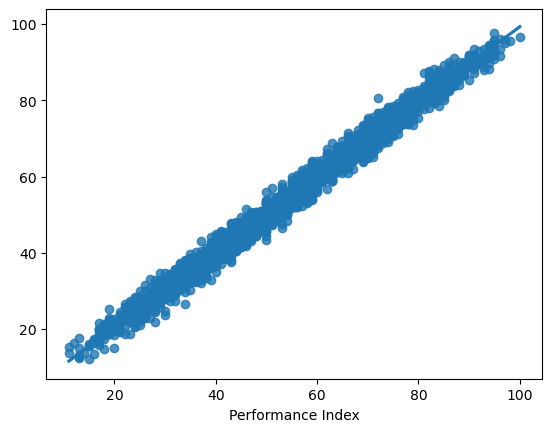

In [69]:
sns.regplot(data=data,x=y_test,y=y_pred)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
mean_squared_error(y_test,y_pred)

4.3945036031656315